In [20]:
import pandas as pd
import csv
import re
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import mojimoji
import japanize_matplotlib
%matplotlib inline

In [2]:
df_anime=pd.read_csv("./birthday_animechara.csv")
df_estats=pd.read_csv("./birthday_estat_1999-2018.csv",usecols=["date","cnt_all"])

In [3]:
df_estats["date"]=df_estats["date"].apply(lambda x:mojimoji.zen_to_han(x))
df_estats=df_estats[df_estats["cnt_all"]!=0]

In [4]:
df=pd.merge(df_estats,df_anime,on="date",how="left")

In [5]:
df["rate_cnt_all"]=df["cnt_all"]/df["cnt_all"].sum()
df["power_cnt_all"]=df["cnt_all"]/df["cnt_all"].mean()
df["rate_num"]=df["num"]/df["num"].sum()
df["power_num"]=df["num"]/df["num"].mean()

In [7]:
#政府統計WORST5
df.sort_values(by="cnt_all").head(5)

,date,cnt_all,num,rate_cnt_all,power_cnt_all,rate_num,power_num
59,2月29日,12704.0,129,0.000594,0.217548,0.003285,1.202384
0,1月1日,40602.0,393,0.001900,0.695282,0.010008,3.663076
1,1月2日,40884.0,98,0.001913,0.700111,0.002496,0.913439
365,12月31日,42460.0,128,0.001987,0.727099,0.003260,1.193063
2,1月3日,43607.0,123,0.002040,0.746741,0.003132,1.146459


In [8]:
#政府統計TOP5
df.sort_values(by="cnt_all",ascending=False).head(5)

,date,cnt_all,num,rate_cnt_all,power_cnt_all,rate_num,power_num
268,9月25日,66897.0,90,0.003130,1.145567,0.002292,0.838872
4,1月5日,66896.0,104,0.003130,1.145550,0.002649,0.969364
359,12月25日,66848.0,236,0.003128,1.144728,0.006010,2.199710
269,9月26日,66827.0,74,0.003127,1.144368,0.001885,0.689739
122,5月2日,66363.0,117,0.003105,1.136422,0.002980,1.090534


In [9]:
#キャラクター統計WORST5
df.sort_values(by="rate_num").head(5)

,date,cnt_all,num,rate_cnt_all,power_cnt_all,rate_num,power_num
146,5月26日,56492.0,42,0.002643,0.967388,0.001070,0.391474
345,12月11日,57466.0,43,0.002689,0.984067,0.001095,0.400795
25,1月26日,61843.0,49,0.002893,1.059020,0.001248,0.456719
351,12月17日,58144.0,50,0.002720,0.995677,0.001273,0.466040
149,5月29日,56433.0,54,0.002640,0.966378,0.001375,0.503323


In [10]:
#キャラクター統計TOP5
df.sort_values(by="rate_num",ascending=False).head(5)

,date,cnt_all,num,rate_cnt_all,power_cnt_all,rate_num,power_num
188,7月7日,63886.0,904,0.002989,1.094005,0.023022,8.426007
62,3月3日,60272.0,553,0.002820,1.032118,0.014083,5.154404
125,5月5日,45680.0,440,0.002137,0.782240,0.011205,4.101154
0,1月1日,40602.0,393,0.001900,0.695282,0.010008,3.663076
91,4月1日,46737.0,361,0.002187,0.800340,0.009193,3.364810


Text(0, 0.5, '創作人物')

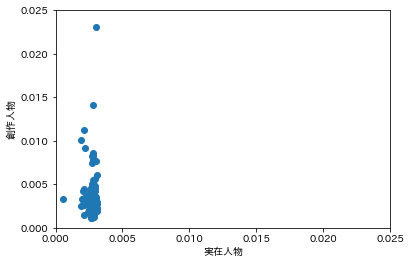

In [11]:
plt.scatter(df["rate_cnt_all"],df["rate_num"])
plt.xlim([0,0.025])
plt.ylim([0,0.025])
plt.xlabel("実在人物")
plt.ylabel("創作人物")

In [12]:
#独立性検定
from scipy import stats
kai,pvalue,_,_=stats.chi2_contingency(df.iloc[:,1:])
print(kai)
print(pvalue)

16919.102549213378
0.0


In [13]:
#7/7のカイ二乗値の計算
df[df["date"]=="7月7日"]

,date,cnt_all,num,rate_cnt_all,power_cnt_all,rate_num,power_num
188,7月7日,63886.0,904,0.002989,1.094005,0.023022,8.426007


In [14]:
display(df["cnt_all"].sum())
display(df["num"].sum())

21373093.0

39267

In [15]:
(63886+904)*(39267/(39267+21373093))##期待値

118.81497088597426

In [16]:
(119-904)**2/119 #カイ二乗値

5178.361344537815

In [17]:
#有意水準
_, chi2_99 = stats.chi2.interval(alpha=0.98, df=366)

In [18]:
chi2_99

431.86516746277834

(0.0, 0.01)

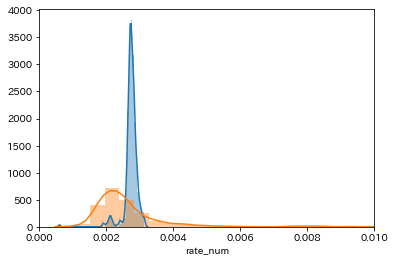

In [21]:
import seaborn as sns
sns.distplot(df["rate_cnt_all"])
sns.distplot(df["rate_num"])
plt.xlim([0,0.010])